In [132]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<style>
    #code{
        color:white;
    }
</style>
<a href="javascript:code_toggle()" id = "code">O código está oculto, para visualizar clique aqui!</a>.''')

# Análise de Desempenho entre o StoragePool do Sistema Operacional e do SLPool

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML

Nos gráficos abaixo é possível perceber o processamento de cada tipo de Gerenciador de Memória. Como suporte, logo abaixo é apresentado a tabela com os resultados de comparações, os quais ajudam a interpretar os gráficos.

Interpretação da tabela:
- <span style="background-color: #F9EBEA; color:##C0392B">qntAllocate</span> - quantidade de dado alocados.
- <span style="background-color: #F9EBEA; color:##C0392B">SLPool</span> - tempo gasto pela SLPool para a qntAllocate.
- <span style="background-color: #F9EBEA; color:##C0392B">SO</span> - tempo gasto pelo SO para realizar a alocação de qntAllocate

In [114]:
dados = pd.read_csv("allocation.csv", sep=';')
repeticoes = pd.read_csv("Quantidade de processamentos.csv", sep=';')
slpool = [30268.9, 149908, 289684, 596986, 903375, 119000000000, 149000000000]

dados

,qntAllocate,SLPool,SO
0,100,30268.9,4868.58
1,500,149908,22444.40
2,1000,289684,46072.90
3,2000,596986,93266.00
4,3000,903375,146028.00
5,4000,"1,19E+11",190179.00
6,5000,"1,49E+11",238404.00


No gráfico abaixo é possível perceber o processamento da SLPool, por volta de 3000 dados alocados o tempo continuou, entretanto, a partir dos 3000 dados o tempo começou a ficar maior, de forma que em mais de 5000 dados o computador começa a ficar mais lento por processar uma quantidade maior de dados.

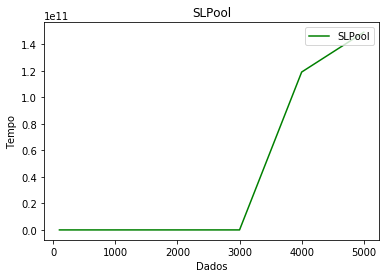

In [99]:
ax = plt.plot(dados["qntAllocate"], slpool, c="green", label ="SLPool")
plt.ylabel("Tempo")
plt.xlabel("Dados")
plt.legend(loc="upper right")
plt.title("SLPool")
plt.show()

Analisando o gráfico da StoragePool do Sistema Operacional temos uma reviravolta quanto as informações, já que o sistema operacional consegue lidar melhor com o processo de alocação e desalocação do sistema, de forma que o tempo fique linear.

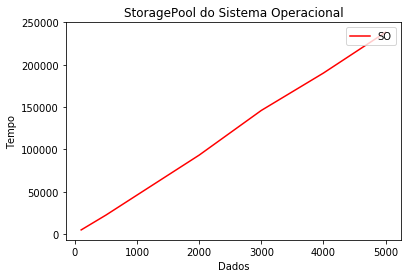

In [62]:
ax1 = dados.plot(x = "qntAllocate", y = "SO", c="red", label ="SO")
ax1.set_ylabel("Tempo")
ax1.set_xlabel("Dados")
plt.legend(loc="upper right")
plt.title("StoragePool do Sistema Operacional")
plt.show()

É importante frizar que ao comparar os dados temos informações bem diferentes, levando-se pelo intervalo de cada gráfico em razão do tempo, por motivos de melhor visualização entre ambos, já que com um maior tempo no gráfico da SLPool não poderiamos analisar bem o gráfico do SO. No gráfico abaixo é possível perceber o funcionamento da SLPool no mesmo intervalo do SO, ou seja (0, 250000). É possível analisar que o SO trata melhor o processo de alocação e liberação, já que trabalha em um menor tempo que o SLPool.

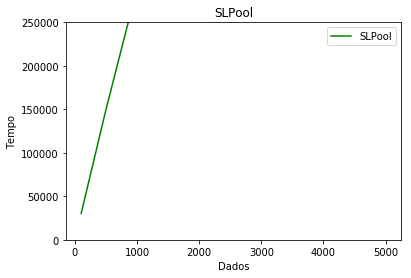

In [105]:
ax1 = plt.plot(dados["qntAllocate"], slpool, c="green", label ="SLPool")
plt.ylim(0, 250000 )
plt.ylabel("Tempo")
plt.xlabel("Dados")
plt.legend(loc="upper right")
plt.title("SLPool")
plt.show()

A tabela abaixo retrata o tempo levado para a realização das alocações e desalocações com repetições variando. Imagine um cenário o qual haverá de tratar os dados várias vezes. Os dados é diferentes dos de cima porque agora a ideia é voltada para uma grande quantidade de repetições, enquanto o outro é para o processo de alocação e liberação de acordo com o tamanho.

Interpretação da tabela:
- <span style="background-color: #F9EBEA; color:##C0392B">Repeticoes</span> - quantidade de repetições realizadas.
- <span style="background-color: #F9EBEA; color:##C0392B">SO</span> - média de tempo em que o StoragePool do Sistema Operacional alocou e desalocou.
- <span style="background-color: #F9EBEA; color:##C0392B">SLPool</span> - média de tempo em que o SLPool realizou as alocações e liberação.

In [121]:
repeticoes.columns = ['Repeticoes', 'SO', 'SLPool']
repeticoes

,Repeticoes,SO,SLPool
0,10,111448.0,70554.8
1,100,48818.8,100250.0
2,1000,46287.5,35323.0
3,10000,47549.3,31408.6
4,100000,46736.7,31545.8


O gráfico abaixo traz uma comparações entre as repetições. É possível notar que as repetições com o SLPool levam menos tempo que as do Sistema Operacional, o qual pode ser uma vantagem caso o usuário veja ser necessário executar várias repetições em alocar e desalocar.

(a mensagem de erro acima do gráfico é normal quando se utiliza a geração de gráfico com pandas apartir de uma tabela.)

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


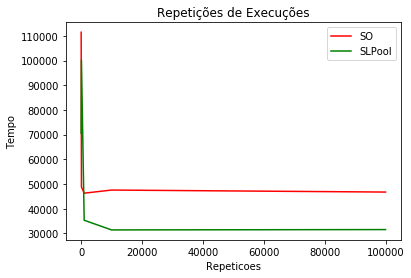

In [128]:
ax = repeticoes.plot(kind='line', x='Repeticoes', y=['SO', 'SLPool'], title="Repetições de Execuções", color=['red', 'green'],
                     legend=True)
plt.ylabel("Tempo")
plt.show()

### Acesso ao GitHub do Gremlins: [GREMLINS](https://github.com/henriquedavidufrn/gremlins)